In [11]:
"""
GHZ state example. It also compares running on experiment and simulator.
"""
import matplotlib.pyplot as plt

from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.providers.fake_provider import Fake20QV1

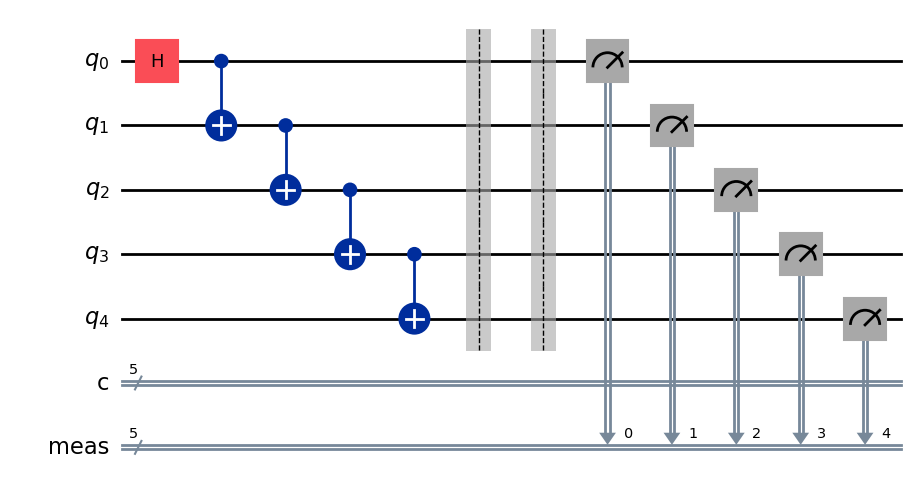

In [12]:
# Make a quantum circuit for the GHZ state.
num_qubits = 5
qc = QuantumCircuit(num_qubits, num_qubits, name="ghz")

# Create a GHZ state circuit
qc.h(0)
for i in range(num_qubits - 1):
    qc.cx(i, i+1)

# Insert a barrier
qc.barrier()

# Measure all of the qubits in the standard basis
# for i in range(num_qubits):
#     qc.measure(i, i)
qc.measure_all()

# Draw the circuit
qc.draw(output="mpl")

In [14]:
# Simulate the experiment with BasicSimulator
# sim_backend = BasicSimulator()
# sim_backend = Fake20QV1()
sim_backend = GenericBackendV2(num_qubits=num_qubits)
job = sim_backend.run(transpile(qc, sim_backend), shots=1024)
result = job.result()
print("Basic simulator: GHZ")
print(result.get_counts(qc))

Basic simulator: GHZ
{'00000 00000': 532, '11111 00000': 492}


/opt/anaconda3/lib/python3.10/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


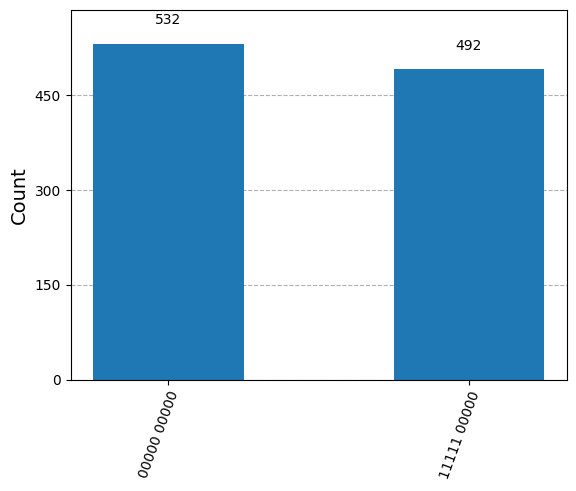

In [15]:
# Visualize the measured result
plot_histogram(result.get_counts(qc), sort='value_desc')

In [ ]:
# Measured results from a hardware simulator machine (QLM at LRZ)


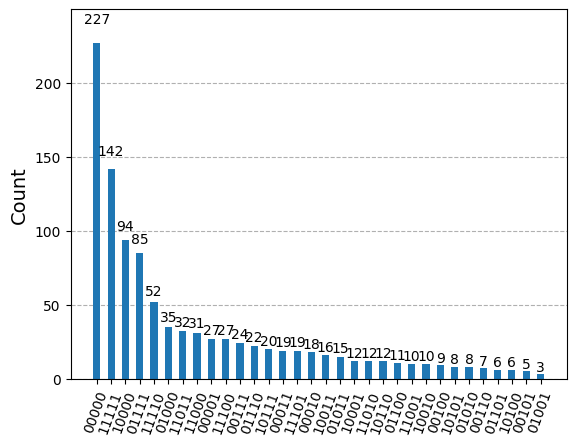

In [17]:
# Measured results from real quantum computers
# IQM 5-qubits machine
iqm5_results = {'00000': 227, '01011': 15, '11111': 142, '11011': 32, '01111': 85, '11100': 27, '00001': 27, '10000': 94, '00010': 18, '10110': 12, '11101': 19, '00110': 7, '11110': 52, '00101': 5, '01000': 35, '01100': 11, '00111': 24, '11010': 12, '00100': 9, '10011': 16, '10010': 10, '11001': 10, '01110': 22, '11000': 31, '10111': 20, '10100': 6, '00011': 19, '01010': 8, '01101': 6, '10001': 12, '10101': 8, '01001': 3}
plot_histogram(iqm5_results, sort='value_desc')

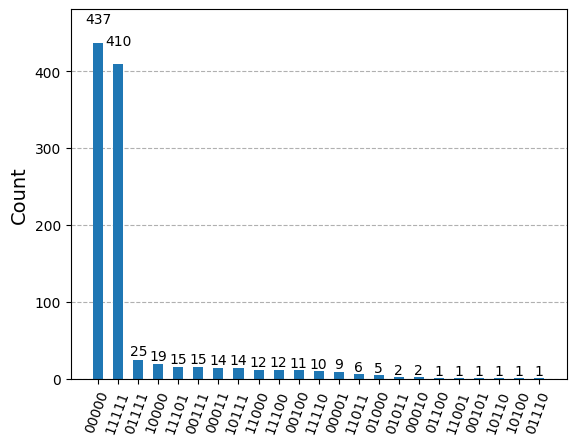

In [16]:
# IQM 20-qubits machine
iqm20_results = {'00010': 2, '11111': 410, '01011': 2, '00000': 437, '10111': 14, '10000': 19, '00001': 9, '01111': 25, '00011': 14, '00111': 15, '00100': 11, '11011': 6, '11100': 12, '11101': 15, '11110': 10, '11000': 12, '01110': 1, '10100': 1, '10110': 1, '00101': 1, '01000': 5, '11001': 1, '01100': 1}
plot_histogram(iqm20_results, sort='value_desc')